In [5]:
import numpy as np
import qiskit
pi = np.pi

In [6]:
def num_to_char(i):
  if i == 0:
    return 'I'
  if i == 1:
    return 'Z'
  if i == 2:
    return 'X'
  if i == 3:
    return 'Y'
  return False

def string_process(s):
  ns = ''
  for i in range(len(s)):
    ns = ns + num_to_char((int)(s[i]))
  return ns
  
def process_family(f):
  nf = []
  for s in f:
    nf = nf + [string_process(s)]
  return nf

def trivial_family(m):
  N = 2**m
  f=[]
  for i in range(1,N):
    ns = bin(i)[2:]
    while(len(ns)<m):
      ns = '0'+ ns
    f = f + [ns]
  return f

def x_family(m):
  tf = trivial_family(m)
  for i in range(len(tf)):
    tf[i] = list(tf[i])
    for j in range(len(tf[i])):
      if(tf[i][j] == '1'):
        tf[i][j] = '2'
    tf[i] = ''.join(tf[i])
  return tf

def get_string(i,j,x,z):
  a = x[i]
  b = z[j]
  c = ((int)(a)) + ((int)(b))
  c = str(c)
  while(len(c)<m):
    c = "0" + c
  return c

def make_A(a):
  m = len(a)
  data = []
  row = [0]*m
  row[0] = a[0]
  row[1] = 1
  data= data + [row]
  for i in range(1,m-1):
    row = [0]*m
    row[i] = a[i]
    row[i+1] = 1
    row[i-1] = 1
    data= data + [row]
  row = [0]*m
  row[m-1] = a[m-1]
  row[m-2] = 1
  data= data + [row]
  return data

def mat_times_vec(A,v):
    m = len(A)
    r = []
    for i in range(m):
        s=0
        for j in range(m):
            s = s + A[i][j] * v[j]
        r = r + [s%2]
    return r
            
def check(A):
  m = len(A)
  N = 2**m
  one = [0]*(m-1) + [1]
  v=one.copy()
  hits = [False]*N
  hits[to_int(v)-1] = True
  for i in range(N-2):
    r = mat_times_vec(A,v)
    r_int = to_int(r)
    if(hits[r_int-1]):
      return False
    else:
      hits[r_int-1] = True
    v = r.copy()
  r = mat_times_vec(A,v)
  return r == one


def try_all_offs(m):
  N = 2**m
  for i in range(1,N):
    l = bin(i)[2:]
    while(len(l)<m):
      l = '0' + l
    l = list(l)
    for i in range(m):
      l[i] = int(l[i])
    A = make_A(l)
    if(check(A)):
      return A,l

def bin_add(a,b):
  c=[]
  for i in range(len(a)):
    if(a[i] == b[i]):
      c = c + [0]
    else:
      c = c + [1]
  return c

def to_int(a):
  m=len(a)
  s=0
  for j in range(m):
    if(a[m-j-1] == 1):
      s = s + 2**j
  return s

def process_A(A,m):
  l1 = []
  for i in range(m):
    t = A[m-i-1]
    N = len(l1)
    #print(t)
    l1 = l1 + [t]
    #print(to_int(t))
    for j in range(N):
      l1 = l1 + [bin_add(l1[j],t)]
  for i in range(len(l1)):
    l1[i] = to_int(l1[i])
  
  data = [l1]
  prev = l1.copy()
  N = 2**m - 1
  for i in range(N-1):
    next = []
    for j in range(N):
      next = next + [prev[l1[j]-1]]
    data = data + [next]
    prev = next.copy()
  return data

str_chars = ['I','Z','X','Y']
int_chars = ['0','1','2','3']

def get_coords(pauli_input,m="unspecified"):
    ps = pauli_input
    if(type(ps) == int):
        ps=list(str(ps))
    if(type(ps) == str):
        ps = list(ps)
    i = []
    j = []
    if(type(ps) == list):
        if(m == "unspecified"):
            m = len(ps)
        else:
            if m != len(ps):
                print("ERROR: Wrong pauli size. m = " + str(m) + " the string " + str(pauli_input) + " has size " + str(len(ps)))
                return null
        ps = list(ps)
        print(ps)
        if ps[0] in str_chars:
            for k in range(m):
                if(ps[k] == 'I') or (ps[k] == 'X'):
                    i = i + [0]
                else:
                    i = i + [1]
            for k in range(m):
                if(ps[k] == 'I') or (ps[k] == 'Z'):
                    j = j + [0]
                else:
                    j = j + [1]
        if ps[0] in int_chars:
            for k in range(m):
                if(ps[k] == '0') or (ps[k] == '2'):
                    i = i + [0]
                else:
                    i = i + [1]
            for k in range(m):
                if(ps[k] == '0') or (ps[k] == '1'):
                    j = j + [0]
                else:
                    j = j + [1]
    while(len(i)<m):
        i = [0] + i
    while(len(j)<m):
        j = [0] + j
    return to_int(i),to_int(j)

tuple_progression = [(0,0),(1,0),(0,1),(1,1)]

def increment_coords(list_tuple,n):
    new_z,new_x = list_tuple
    ct = (new_z[n],new_x[n])
    for i in range(3):
        if ct == tuple_progression[i]:
            ct_z,ct_x = tuple_progression[i+1]
            new_x[n] = ct_x
            new_z[n] = ct_z
            return (new_z,new_x)
    ct_z,ct_x = tuple_progression[0]
    new_x[n] = ct_x
    new_z[n] = ct_z
    return increment_coords((new_z,new_x),n-1)

def increment_string(s,n):
    new_s = s
    for i in range(3):
        #print("s = " + str(s))
        if s[n] == str_chars[i]:
            new_s[n] = str_chars[i+1]
            return new_s
    new_s[n] = "I"
    return increment_string(s,n-1)

def eigenvalue(i,j):
    i = list(bin(i)[2:])
    j = list(bin(j)[2:])
    m = len(i)
    d = len(j)-m
    if(d<0):
        m = len(j)
        d = len(i)-m
        t=i.copy()
        i=j.copy()
        j=t.copy()
    s=0
    for k in range(m):
        if((i[k] == '1') & (j[k-d] == '1')):
            s = s + 1
    s = (s+1)%2
    if s == 0:
        s = -1
    return s
            
def enum_strings(m):
    s1 = ['I']*m
    sl=[]
    for i in range(4**m):
        sl = sl + ["".join(s1)]
        increment_string(s1,m-1)
    return sl

def apply_e_z(circuit,l):
    for i in range(1,len(l)):
        qc.cx(l[0],l[i])
    qc.s(l[0])
    for i in range(1,len(l)):
        qc.cx(l[0],l[i])
        
def get_change_list(index,m):
    s = list(bin(index)[2:])
    d = m - len(s)
    l=[]
    first = False
    for i in range(len(s)):
        if(s[len(s)-i-1] == '1'):
            l = l + [i]
    return l

def apply_e_x(circuit,index,m): 
    l = get_change_list(index,m)
    for i in l:
        circuit.u(-pi,0,0,i)
    apply_e_z(circuit,l)
    for i in l:
        circuit.u(pi,0,0,i)
        
def apply_e_x_series(circuit,x_list,m):
    change_lists = []
    for x in x_list:
        change_lists = change_lists + [get_change_list(x,m)]
    for i in range(m):
        circuit.u(-pi,0,0,i)
    for l in change_lists:
        apply_e_z(circuit,l)
    for i in range(m):
        circuit.u(pi,0,0,i)

In [7]:
class family:
    def __init__(self,p,m):
        super().__init__()
        self.p = p
        self.q = False
        self.m = m
    def set_q(self,q):
        self.q = q
        l=[]
        for i in range(m):
            l = l + [q[2**i-1]]
        self.x_list=l
    def apply_to_circuit(self,circuit):
        apply_e_x_series(circuit,self.x_list,self.m)
    def set_coefficients(self,c):
        self.coefficients = c

class pauli_organizer:
    def __init__(self,m):
        super().__init__()
        self.m = m
        self.N = 2**m
        self.f = self.build_family_group()
        self.pauli_decomposition = self.initialize_decomposition()
        
    def input_pauli_decomps(self,pauli_dict):
        coords = ([0]*self.m,[0]*self.m)
        cp = ['I']*self.m
        self.pauli_decomposition[0][0] = pauli_dict["".join(cp)]
        for i in range(self.N ** 2):
            #print("coords = " + str(coords))
            #print('cp = ' + str("".join(cp)))
            coords = increment_coords(coords,self.m - 1)
            cp = increment_string(cp,self.m - 1)
            i = to_int(coords[0])
            j = to_int(coords[1])
            self.pauli_decomposition[i][j] = pauli_dict["".join(cp)]
        
    
    def input_pauli_decomp(self,pauli_string,value):
        i,j = get_coords(pauli_string,self.m)
        self.pauli_decomposition[i][j] = value
    
    def initialize_decomposition(self):
        pc = []
        for i in range(self.N):
            row = []
            for j in range(self.N):
                row = row + [0]
            pc = pc + [row]
        return pc
        
    def build_family_group(self):
        A,l = try_all_offs(self.m)
        self.generating_vector = l
        self.generating_matrix = A
        sol = process_A(A,self.m)
        f=[]
        for i in range(self.N - 1):
            fam = family(sol[i],self.m)
            q_i = 0
            if(i%2 == 1):
                q_i = (int)((i+1)/2) - 1
            else:
                q_i = (int)((self.N + i)/2) - 1
            fam.set_q(sol[q_i])
            f = f + [fam]
            #print(str(i+1) + " goes with " + str(q_i + 1))
        return f
        #x = x_family(self.m)
        #z = trivial_family(self.m)
        #f = []
        #for i in range(self.N-1):
        #  newf = []
        #  for j in range(self.N-1):
        #    newf = newf + [get_string(j,sol[i][j]-1,x,z)]
        #  f = f + [newf]
        #return f
    
    def properties(self):
        s = f''
        s = s + 'Qubits: ' + str(self.m) + '\nGenerating vector: ' + str(to_int(self.generating_vector)) + '\nGenerating Matrix:'
        A = self.generating_matrix
        for row in A:
            s = s + '\n' + str(row)
        return s
    
    def calc_coefficients(self):
        f=self.f
        for family_index in range(len(f)):
            p = f[family_index].p
            for state_index in range(1,len(f)):
                s = 0
                c=[]
                for string_index in range(1,len(f)):
                    v = eigenvalue(string_index,state_index)
                    effect = self.pauli_decomposition[string_index][p[string_index]]*v
                    s = s + effect
                c=c+[s]
            f[family_index].set_coefficients(c)
        return f

def gen_random_pauli_dict(m):
    pauli_dict = dict()#dict.fromkeys(enum_strings(m))
    cp = ['I']*m
    coords = ([0]*m,[0]*m)
    pauli_dict["".join(cp)] = np.random.random()
    for i in range(4** m):
        coords = increment_coords(coords,m - 1)
        cp = increment_string(cp,m - 1)
        pauli_dict["".join(cp)] = np.random.random()
    return pauli_dict

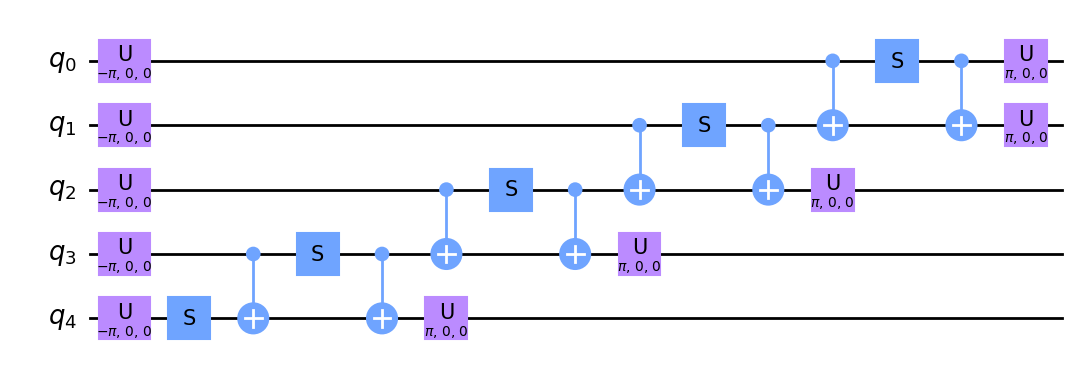

In [8]:
m=5
pauli_dict = gen_random_pauli_dict(m)

PO = pauli_organizer(m)

fam = PO.calc_coefficients()[0]

qc = qiskit.QuantumCircuit(m)
#x_list=[7]
#apply_e_x_series(qc,x_list,m)
fam.apply_to_circuit(qc)

font = {
  "fontsize": 15,
  "subfontsize": 10,
}

qc.draw("mpl",style = font)